<a href="https://colab.research.google.com/github/Connect2shlokjain/TenserFlow-Learning/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

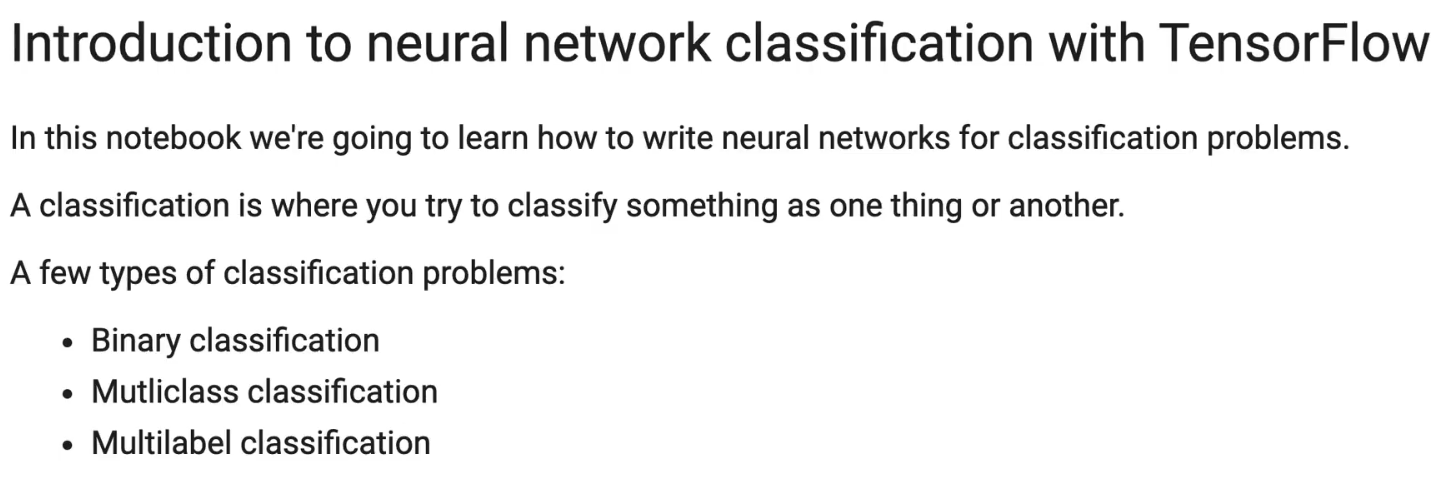

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples= 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check out labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

X0        X1  label
0    0.754246  0.231481      1
1   -0.756159  0.153259      1
2   -0.815392  0.173282      1
3   -0.393731  0.692883      1
4    0.442208 -0.896723      0
..        ...       ...    ...
995  0.244054  0.944125      0
996 -0.978655 -0.272373      0
997 -0.136900 -0.810012      1
998  0.670362 -0.767502      0
999  0.281057  0.963824      0

[1000 rows x 3 columns]

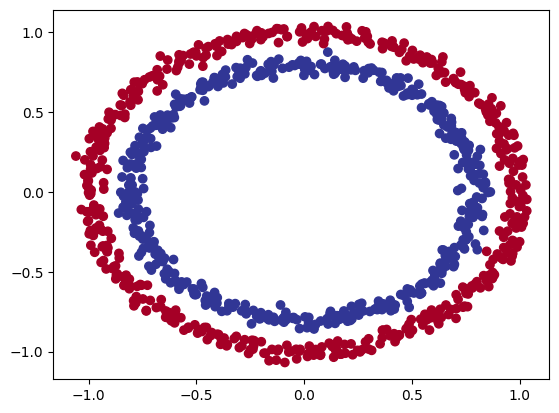

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

### Steps in modelling

The Steps in modeling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate..

In [9]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [10]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 3.7919 - accuracy: 0.4800
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 1.2223 - accuracy: 0.4910
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7248 - accuracy: 0.4960
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7036 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6970 - accuracy: 0.4850


In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [12]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

### Improving our model
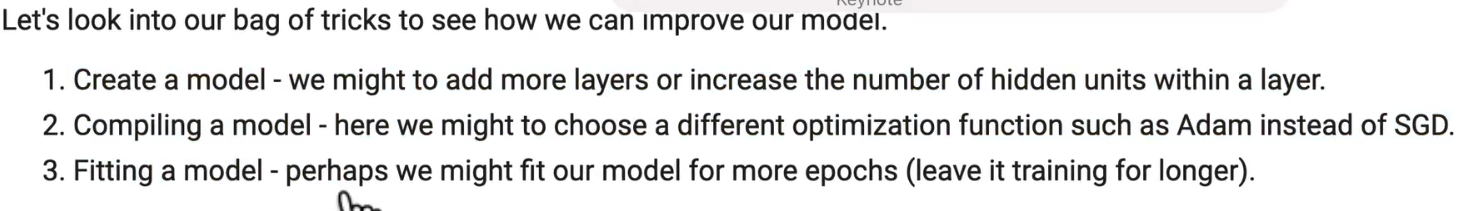

In [13]:
# Check how diverse is our data from before
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Reminder
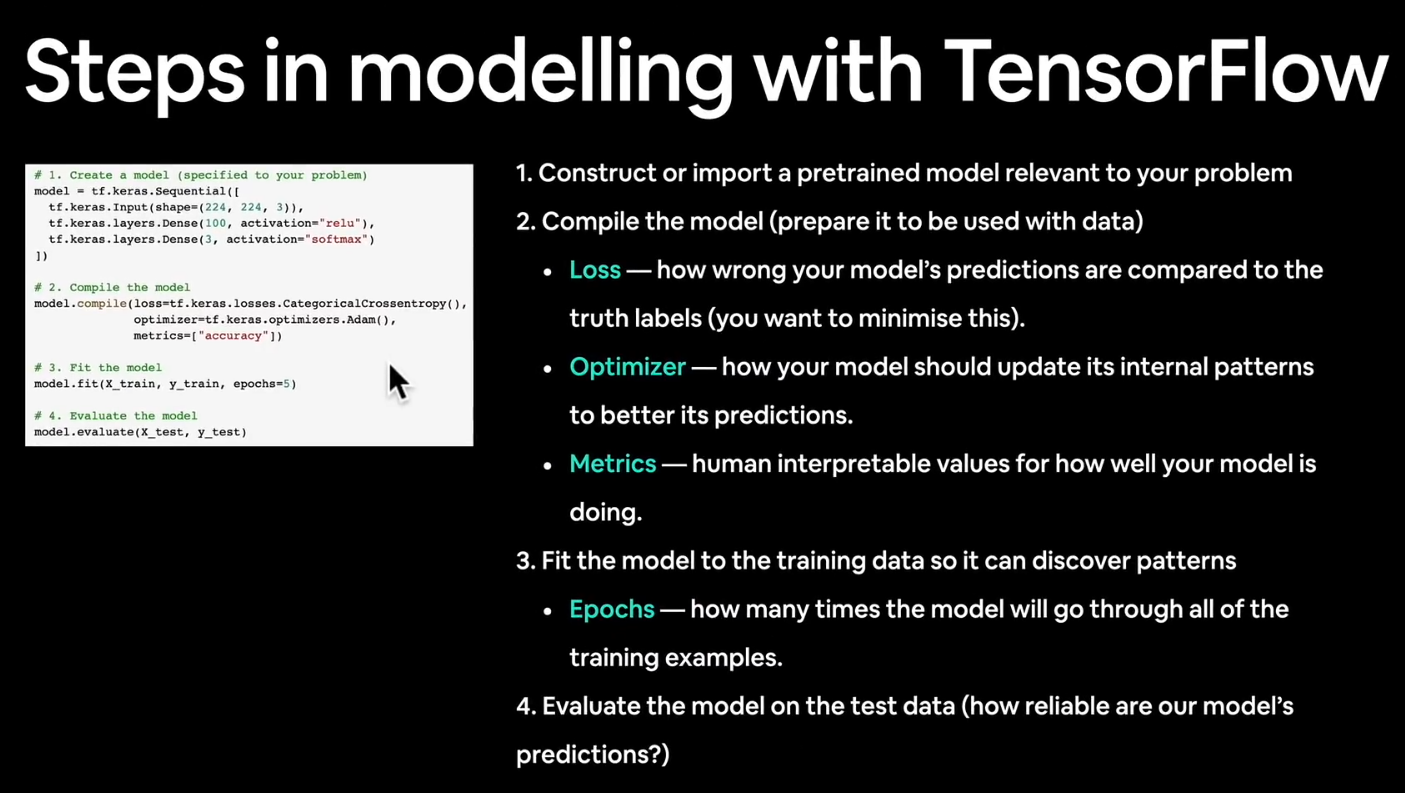

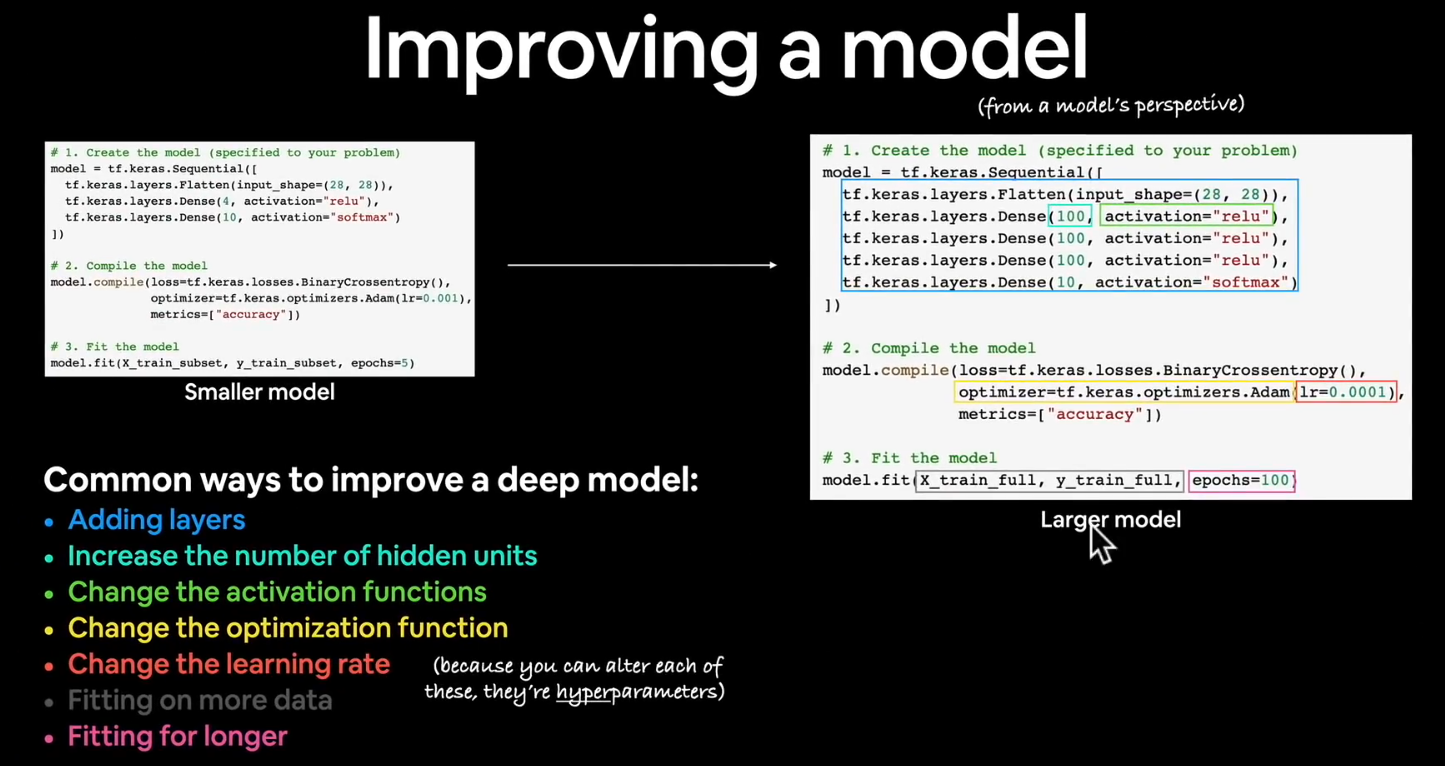

In [14]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

In [15]:
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X,y, epochs=100, verbose=0)

In [16]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.5120


[0.6936048865318298, 0.5120000243186951]

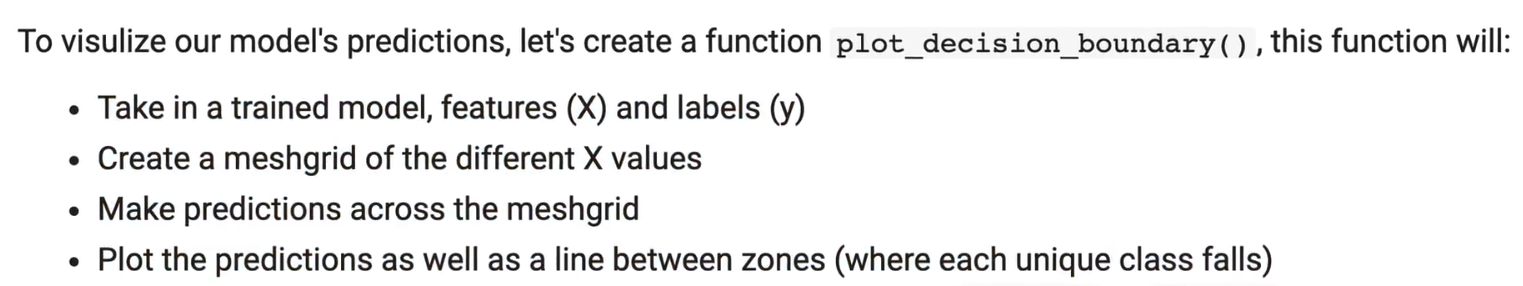

In [17]:
import numpy as np

def plot_decision_boundary(model, X,y):
  """
  Plots the decision boundary created by a model prediciting on X.
  """
  # Define the axos boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,0].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for mulit-classs
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our predicition to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [18]:
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:,1].min() - 0.1, X[:,0].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1337117525463374)

In [19]:
X,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

313/313 [==============================] - 1s 2ms/step
doing binary classification


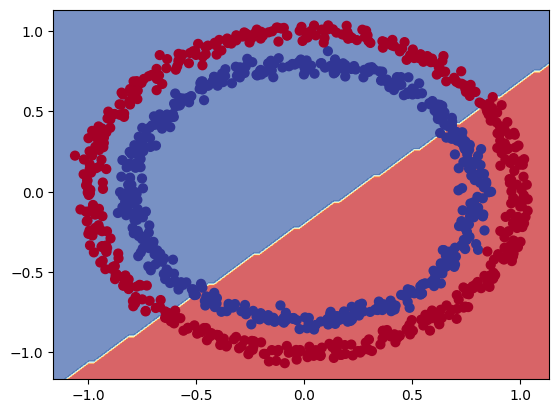

In [20]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [21]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1000,5) # y = x +100

X_regression, y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [22]:
# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = X_regression[:150]
y_reg_test = X_regression[150:]
"""
# Fit our model to regression data
model_3.fit(X_reg_train, y_reg_train, epochs=100)
""" # Why you get an error here is important

'\n# Fit our model to regression data\nmodel_3.fit(X_reg_train, y_reg_train, epochs=100)\n'

In [23]:
"""tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Recompile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(X_reg_train,y_reg_train, epochs=100)""" #Some error here

'tf.random.set_seed(42)\n\nmodel_3 = tf.keras.Sequential([\n    tf.keras.layers.Dense(100),\n    tf.keras.layers.Dense(10),\n    tf.keras.layers.Dense(1)\n])\n\n# Recompile the model, this time with a regression-specific loss function\nmodel_3.compile(loss=tf.keras.losses.mae,\n                optimizer=tf.keras.optimizers.Adam(),\n                metrics=["mae"])\n\nmodel_3.fit(X_reg_train,y_reg_train, epochs=100)'

if you solve the error then run this

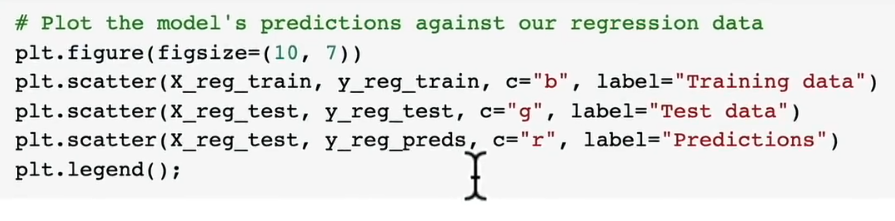

## Let's Go with Non Linear data structure

In [24]:
# Set the random Seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.7225 - accuracy: 0.4810
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5129 - accuracy: 0.4810
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4823 - accuracy: 0.4790
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4870 - accuracy: 0.4760
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4724 - accuracy: 0.4760
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4588 - accuracy: 0.4760
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4332 - accuracy: 0.4750
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4169 - accuracy: 0.4750
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4126 - accuracy: 0.4750
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4086 - accuracy: 0.4750
Epoch 11/

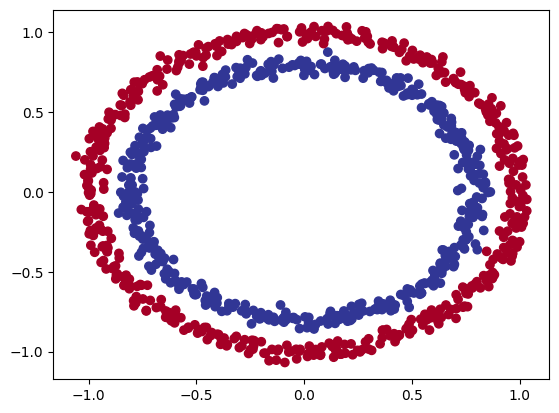

In [25]:
# Checking the data since we get the inverse we started to guess
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classification


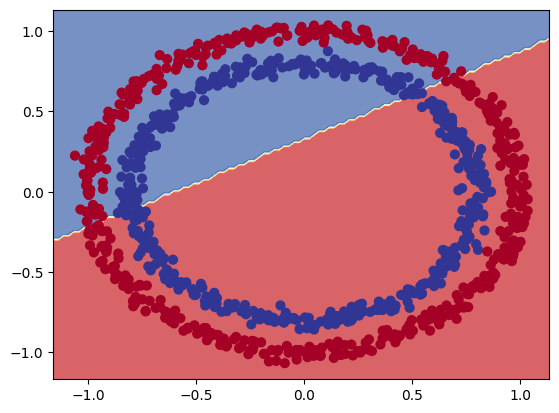

In [26]:
# Checking the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

### Let's try building our first network with a non-linear activation function.

In [27]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 6.0316 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0075 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9853 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 5.9722 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9686 - accuracy: 0.4840
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9496 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9338 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9322 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9305 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9289 - accuracy: 0.4850
Epoch 11/

In [28]:
# Time to replicate the multi-layer neural network from TensorFlow playground in code...

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu")
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 3.4338 - accuracy: 0.2650
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 3.3308 - accuracy: 0.2760
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.3099 - accuracy: 0.2860
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 3.2866 - accuracy: 0.2880
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.2620 - accuracy: 0.2890
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.2545 - accuracy: 0.2890
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.2291 - accuracy: 0.2900
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.1970 - accuracy: 0.2900
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.1349 - accuracy: 0.2660
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.0501 - accuracy: 0.2350
Epoch 11/

In [29]:
# Evaluate the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 2.4381 - accuracy: 0.1560


[2.4380691051483154, 0.15600000321865082]

In [30]:
X,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [31]:
# For X
print("X shape:", X.shape)

# For y
print("y shape:", y.shape)


X shape: (1000, 2)
y shape: (1000,)


#### (not the things we were expecting here it got even worse 🤦‍♂️)

313/313 [==============================] - 1s 3ms/step
doing multiclass classification


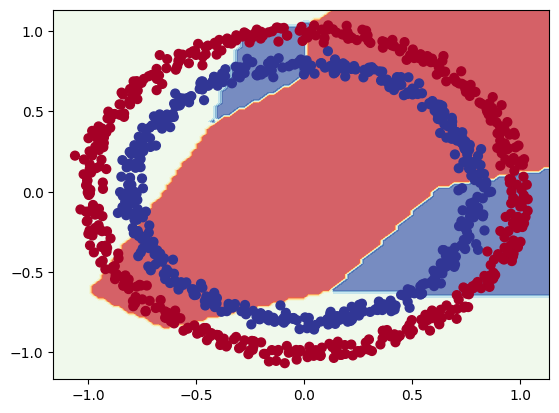

In [32]:
# prompt: use above code and use plot_decision_boundary(model_6, X, y) this properly

plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

  # Finally Removing all the error and getting a model that works

In [33]:
"""
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X,y, epochs=100)"""
# Some How I messedup with the dimentions

'\n# Set random seed\ntf.random.set_seed(42)\n\n# 1. Create a model\nmodel_7 = tf.keras.Sequential([\n    tf.keras.layers.Dense(4, activation="relu"),\n    tf.keras.layers.Dense(4, activation="relu"),\n    tf.keras.layers.Dense(4, activation="sigmoid")\n])\n\n# 2. Compile the model\nmodel_7.compile(loss="binary_crossentropy",\n                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),\n                metrics=["accuracy"])\n\n# 3. Fit the model\nhistory = model_7.fit(X,y, epochs=100)'

In [34]:
"""
#4. Evaluate our model
model_7.evaluate(X,y)
"""

'\n#4. Evaluate our model\nmodel_7.evaluate(X,y)\n'

In [35]:
# and after that
# Let's visualize our incredible metrics
"""
plot_decision_boundary(model_7, X, y)
"""

'\nplot_decision_boundary(model_7, X, y)\n'

In [36]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
# Create a toy a tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

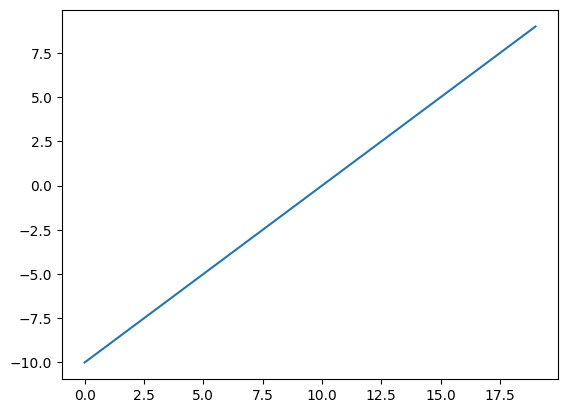

In [37]:
# Visualize our toy tensor
plt.plot(A)

In [38]:
# sigmoid(x) = 1/(1+ exp(-x))
# genralized form
# tf.keras.activations.sigmoid(
#     x
# )

In [39]:
# Let's start by replicationg sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

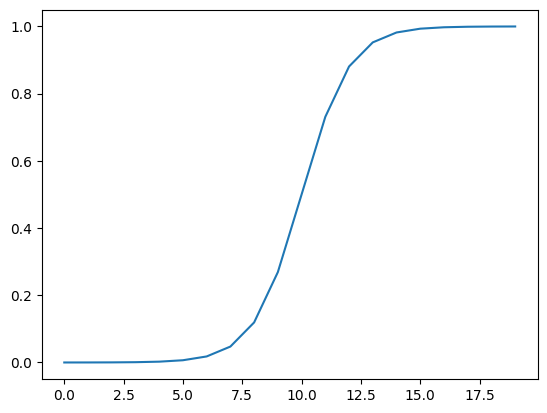

In [40]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [41]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0,x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [42]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

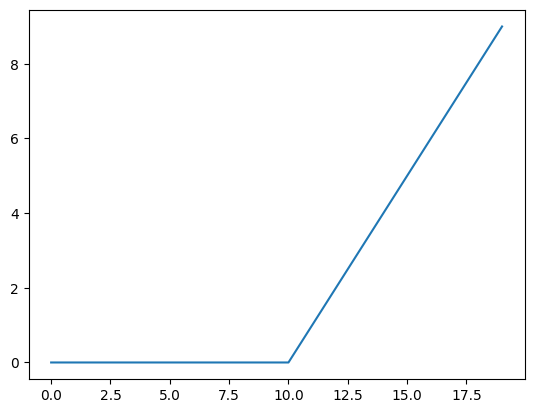

In [43]:
# Plot our toy tensor transformed by relu
plt.plot(relu(A));

In [44]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

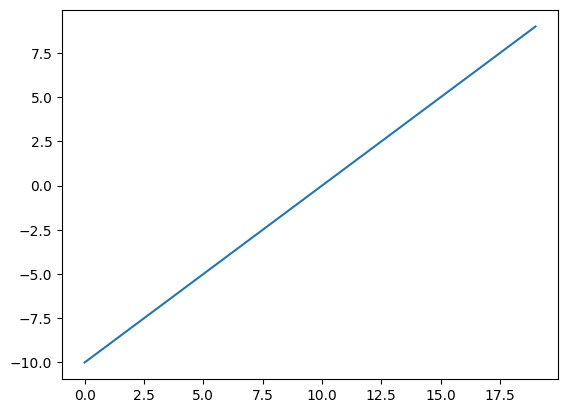

In [45]:
# Does the linear activation function changes anything ?
plt.plot(tf.keras.activations.linear(A));

In [46]:
# Does the linear activation function changes anything ?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [47]:
# No nothing is changed.
# Then Why are we using it, still one of the prefered method, let's explore it.
# First going back to the basics

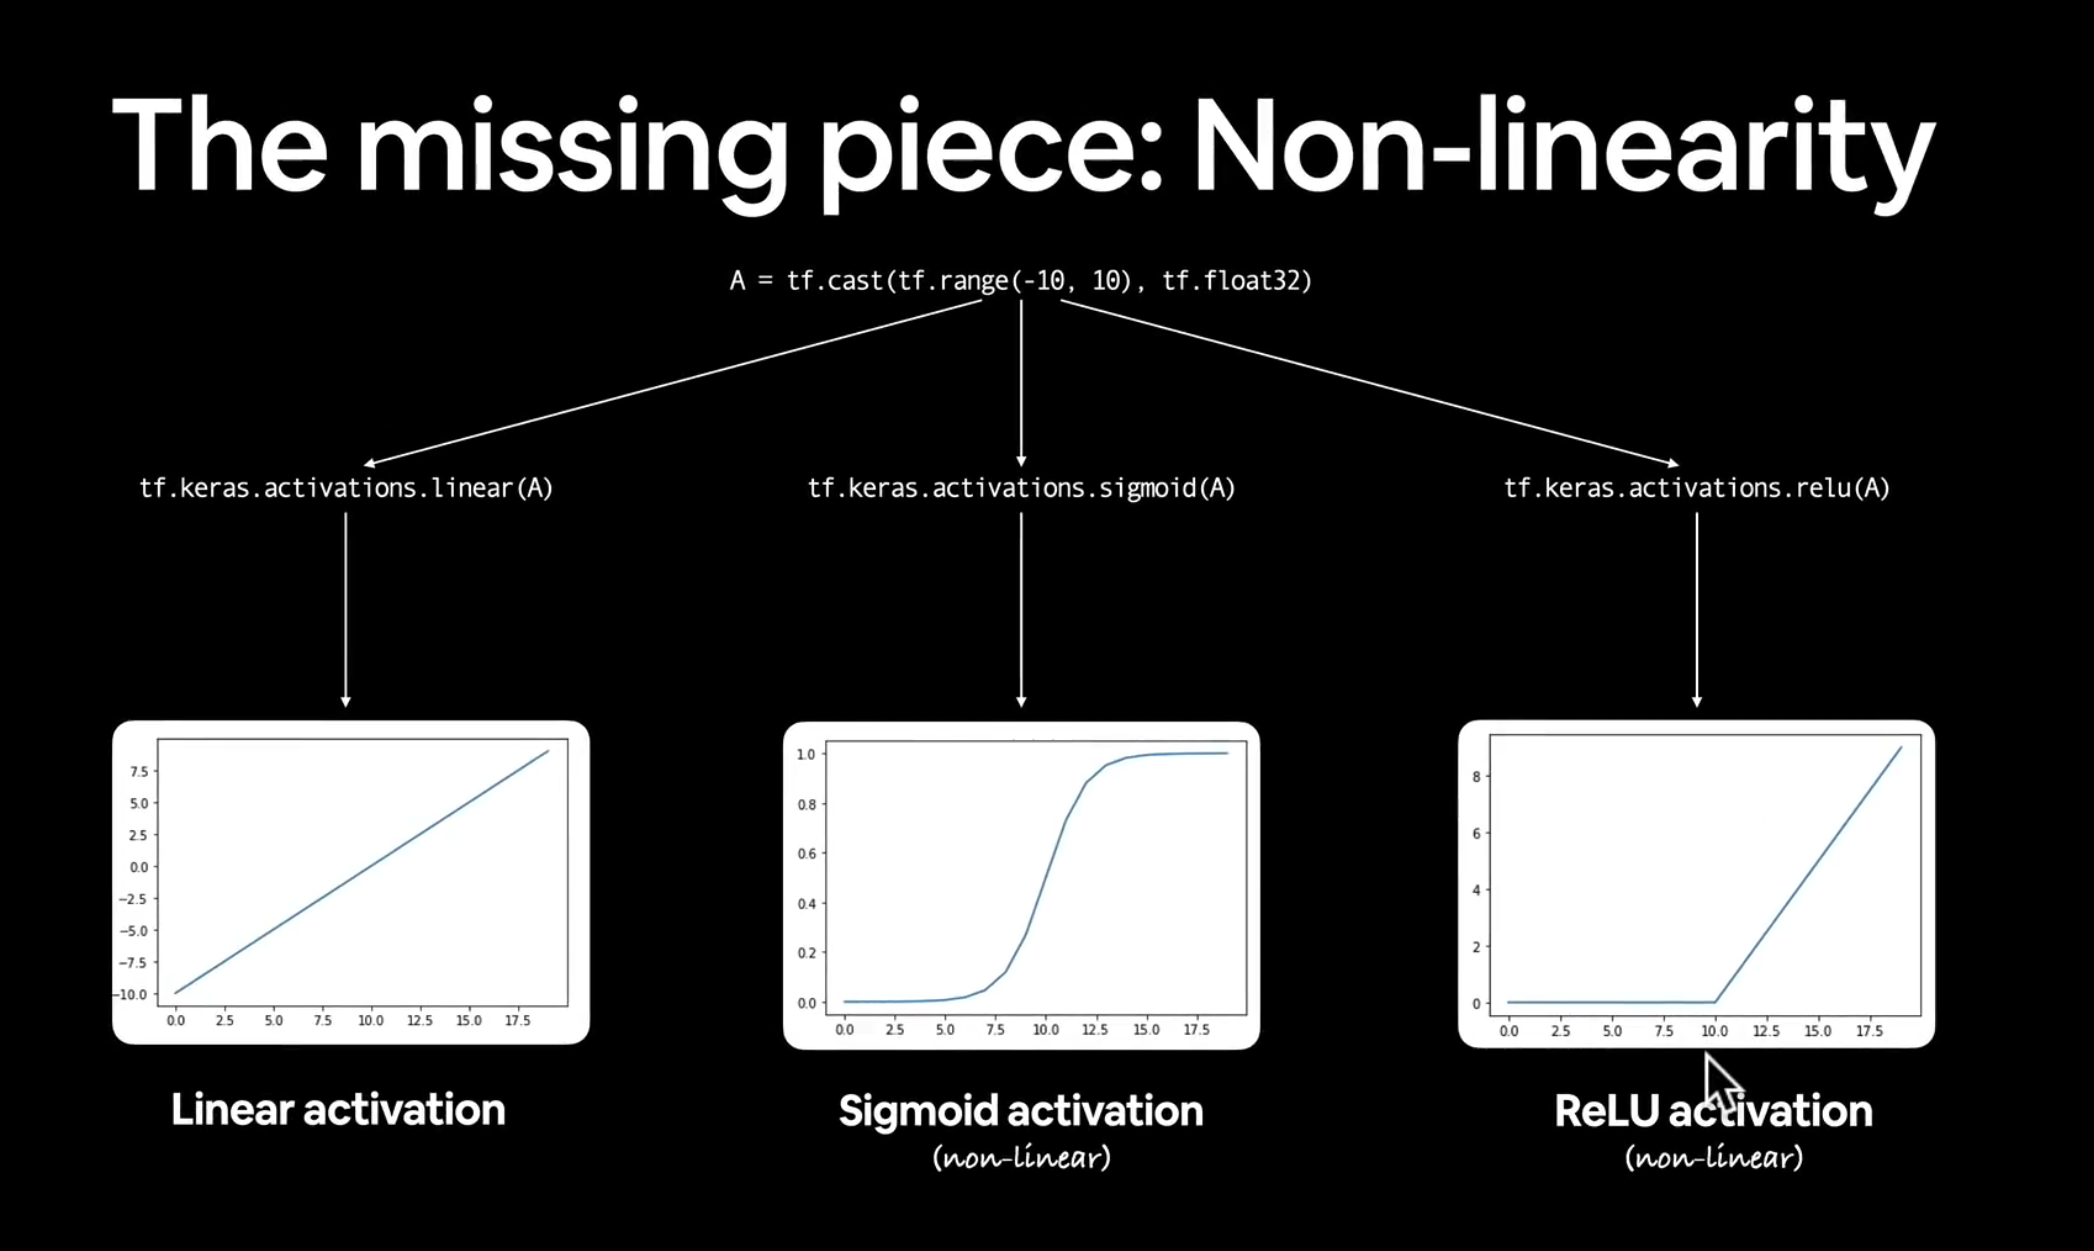

## Evaluationg and imporving our classification
#### So far we've been training and testing on the same dataset...
#### However, in machine learning this is basically a <b>"sin"</b>
#### So lat's create a training and test set.

In [48]:
# Check how many examples we have
len(X)

1000

In [49]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [50]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [51]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 2s 3ms/step - loss: 0.6883 - accuracy: 0.5325
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.5487
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6735 - accuracy: 0.5663
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6675 - accuracy: 0.5763
Epoch 5/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6626 - accuracy: 0.5925
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6545 - accuracy: 0.5650
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6381 - accuracy: 0.6338
Epoch 8/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6161 - accuracy: 0.6837
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5839 - accuracy: 0.7688
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5456 - accuracy: 0.8050
Epoch 11/25
25/25 [

In [52]:
# 4. Evaluate the model on the test dataset
model_8. evaluate(X_test, y_test)

7/7 [==============================] - 0s 7ms/step - loss: 0.1694 - accuracy: 0.9700


[0.16944129765033722, 0.9700000286102295]

313/313 [==============================] - 1s 4ms/step
doing binary classification
313/313 [==============================] - 1s 4ms/step
doing binary classification


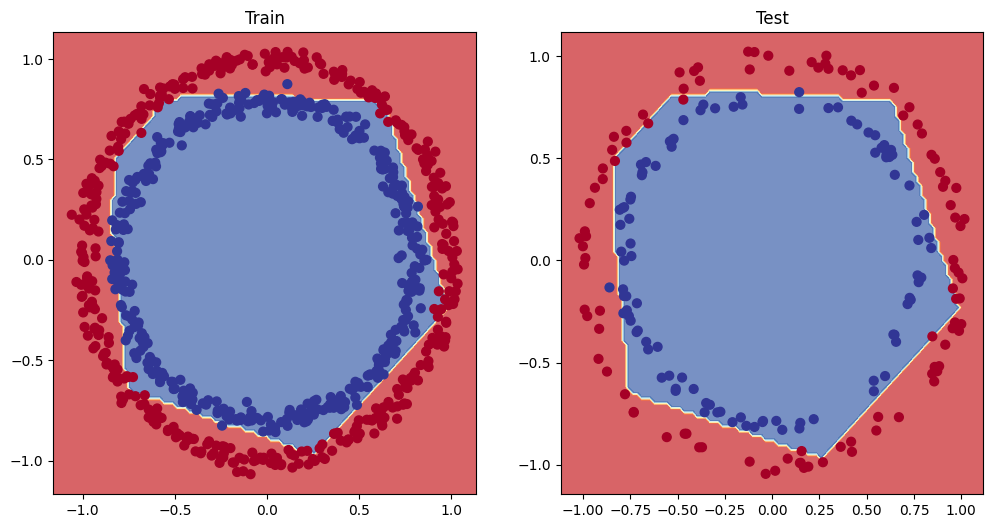

In [53]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

# prompt: what insights we can take form the image we have drawn above for test and train dataset

The decision boundaries for the training and test sets are different. This means that the model is not generalizing well to the test set. This could be because the model is overfitting to the training set, or because the training set is not representative of the test set.

To improve the model's performance, we could try to reduce overfitting by using a smaller learning rate or by adding regularization to the model. We could also try to make the training set more representative of the test set by using a more balanced dataset or by using a different sampling method.

Here are some specific things you can do to improve the model's performance:

* Use a smaller learning rate. This will help to slow down the model's learning process and reduce the risk of overfitting.
* Add regularization to the model. Regularization helps to prevent the model from learning too much from the training set and generalizes better to new data.
* Make the training set more representative of the test set. This can be done by using a more balanced dataset or by using a different sampling method.
* Use a different model architecture. There are many different types of neural network architectures that can be used for classification tasks. Some architectures may be more suitable for your data than others.

By following these tips, you can improve the performance of your neural network classification model and make it more likely to generalize well to new data.


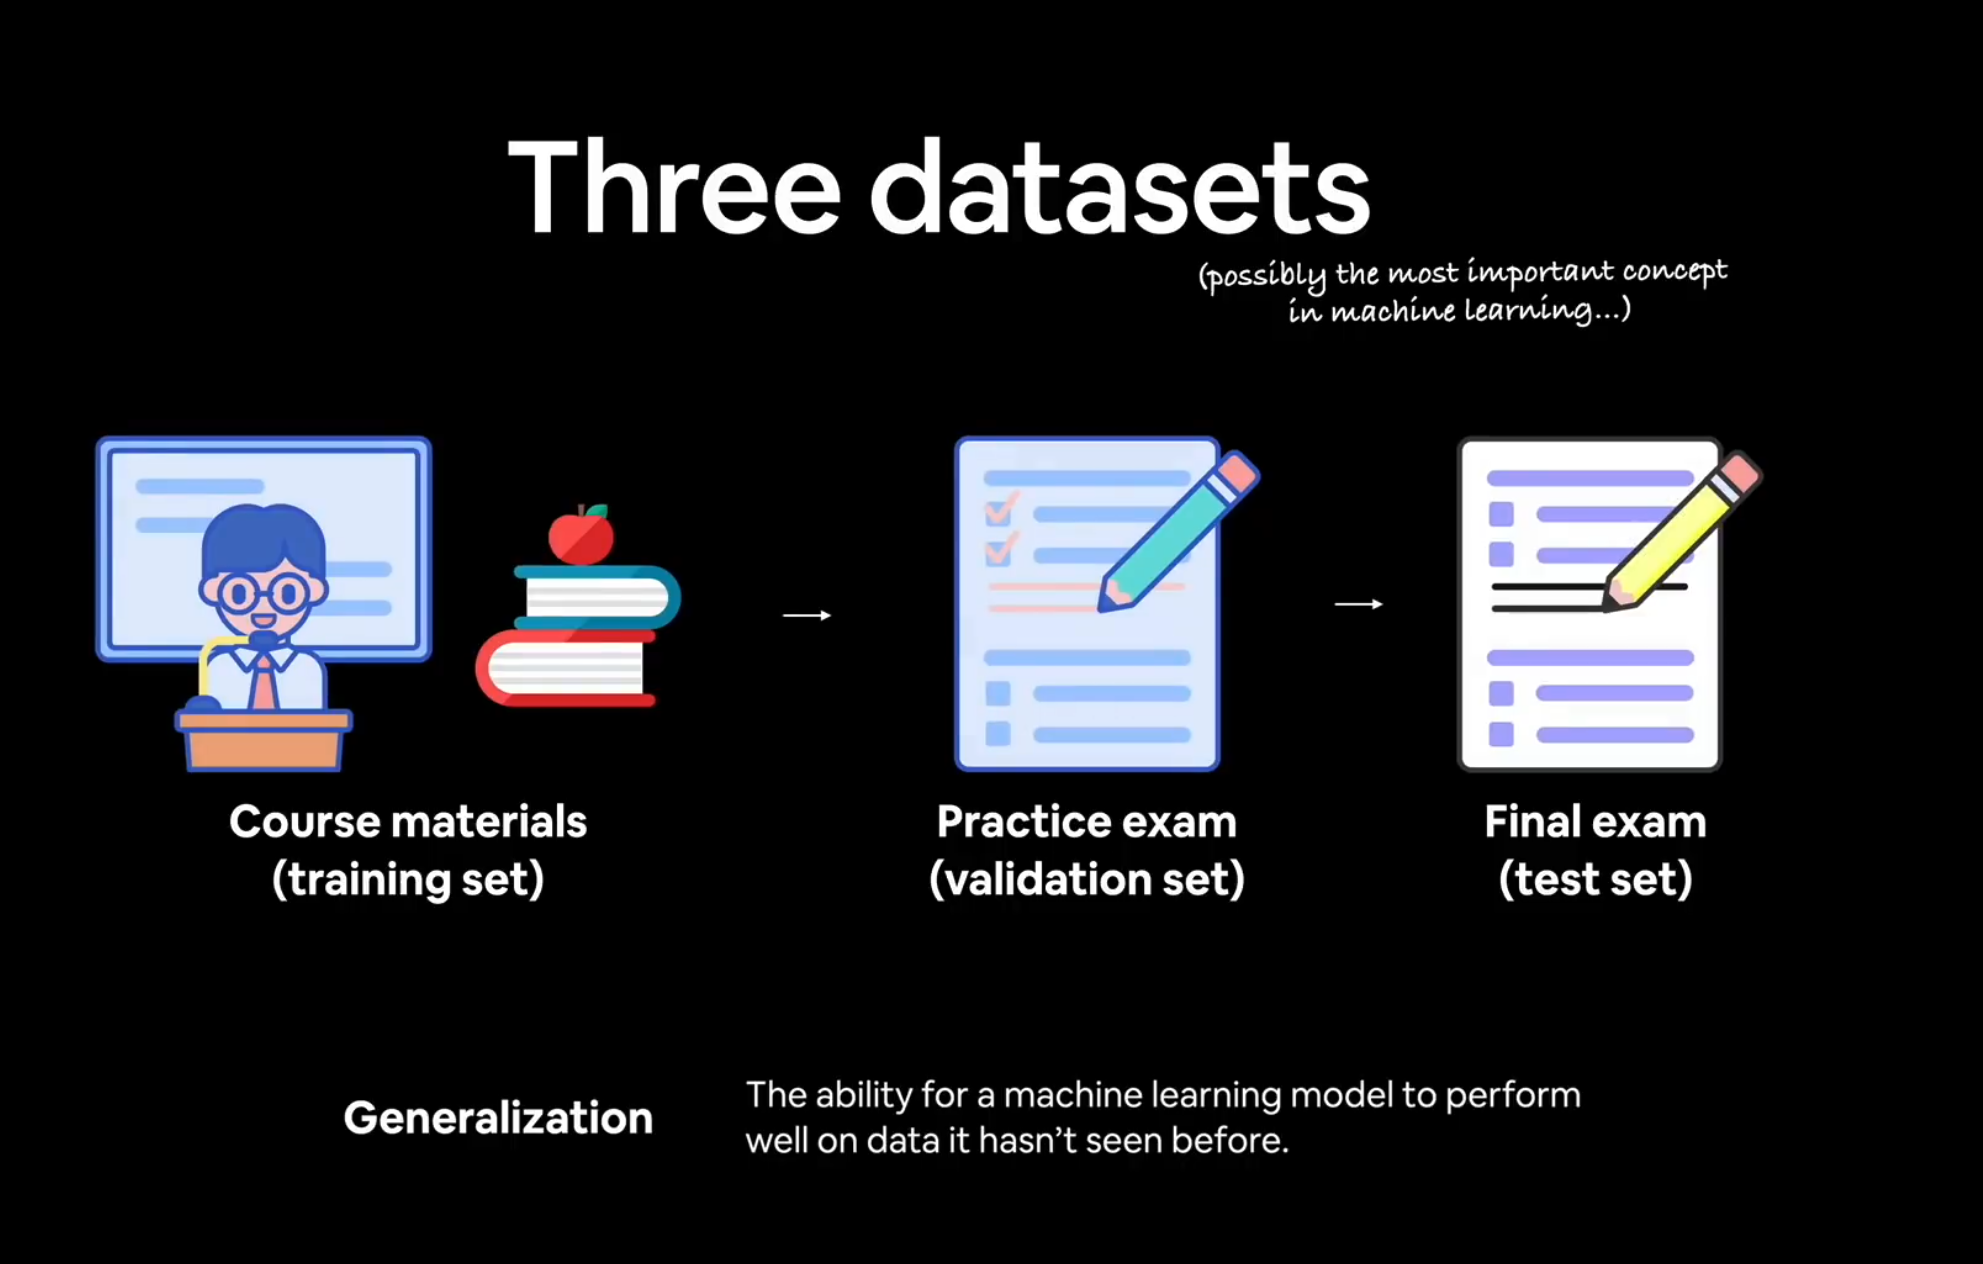

## PLot the loss (or training) curves

In [54]:
history.history

{'loss': [0.6882680654525757,
  0.6801926493644714,
  0.6734831929206848,
  0.6674625277519226,
  0.6625559329986572,
  0.6545307636260986,
  0.6381353735923767,
  0.6160750389099121,
  0.5839234590530396,
  0.5456429123878479,
  0.5185332298278809,
  0.4800136685371399,
  0.45115387439727783,
  0.412129670381546,
  0.38052603602409363,
  0.35826030373573303,
  0.3245540261268616,
  0.3002210855484009,
  0.2902294397354126,
  0.27070480585098267,
  0.25762903690338135,
  0.23448792099952698,
  0.2185707837343216,
  0.2159603238105774,
  0.21664035320281982],
 'accuracy': [0.5325000286102295,
  0.5487499833106995,
  0.5662500262260437,
  0.5762500166893005,
  0.5924999713897705,
  0.5649999976158142,
  0.6337500214576721,
  0.6837499737739563,
  0.768750011920929,
  0.8050000071525574,
  0.8050000071525574,
  0.8475000262260437,
  0.8500000238418579,
  0.8700000047683716,
  0.8725000023841858,
  0.887499988079071,
  0.8949999809265137,
  0.9087499976158142,
  0.90625,
  0.91124999523162

In [55]:
 # Converting the history object into a dataframe

 pd.DataFrame(history.history)

loss  accuracy
0   0.688268   0.53250
1   0.680193   0.54875
2   0.673483   0.56625
3   0.667463   0.57625
4   0.662556   0.59250
5   0.654531   0.56500
6   0.638135   0.63375
7   0.616075   0.68375
8   0.583923   0.76875
9   0.545643   0.80500
10  0.518533   0.80500
11  0.480014   0.84750
12  0.451154   0.85000
13  0.412130   0.87000
14  0.380526   0.87250
15  0.358260   0.88750
16  0.324554   0.89500
17  0.300221   0.90875
18  0.290229   0.90625
19  0.270705   0.91125
20  0.257629   0.91375
21  0.234488   0.93000
22  0.218571   0.93375
23  0.215960   0.92000
24  0.216640   0.93375

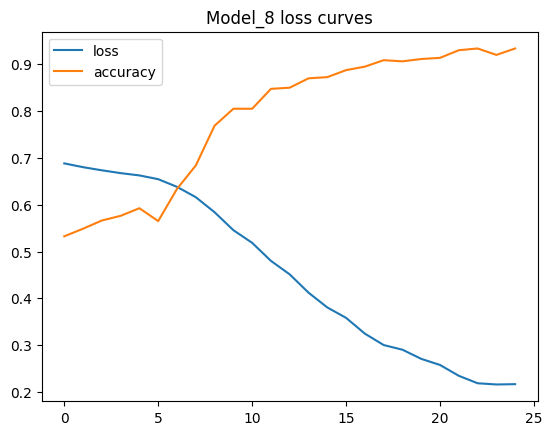

In [56]:
# plotting the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

## Finding the best learning rate
To find the ideal learning rate (the learning rate where the
loss decreases the most during training) we ' re going to use
the following steps :
* A learning rate **callback**
— you can think of a callback
as an extra piece of funtionality, you can add to your *while*
its training.
* Another model (we could use the same one as above, but we ' re
practicing building models here)
* A modified loss curves plot.

In [57]:
# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 2s 5ms/step - loss: 0.7363 - accuracy: 0.4925 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7351 - accuracy: 0.4925 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 0.7338 - accuracy: 0.4950 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7324 - accuracy: 0.4863 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7309 - accuracy: 0.4850 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7294 - accuracy: 0.4863 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7277 - accuracy: 0.4787 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7260 - accuracy: 0.4750 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss:

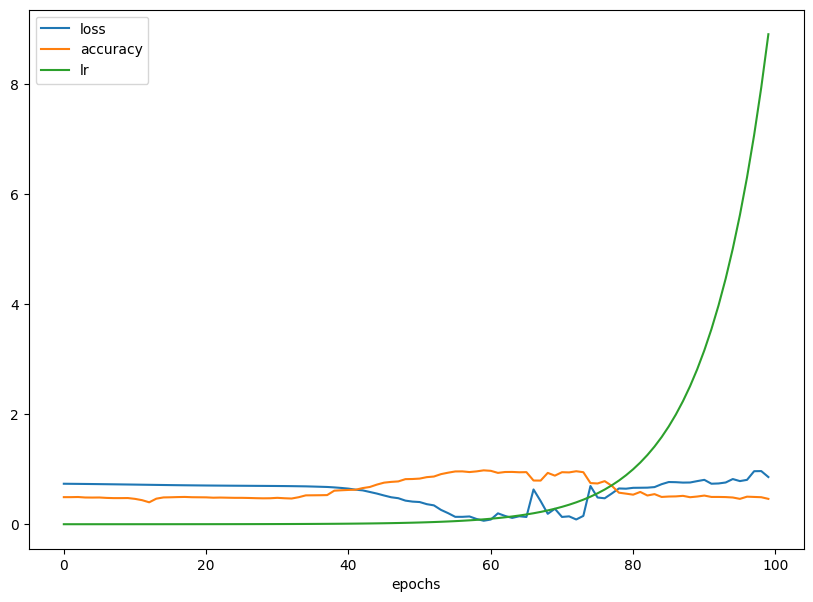

In [58]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs");

Text(0.5, 1.0, 'Learning rate vs. Loss')

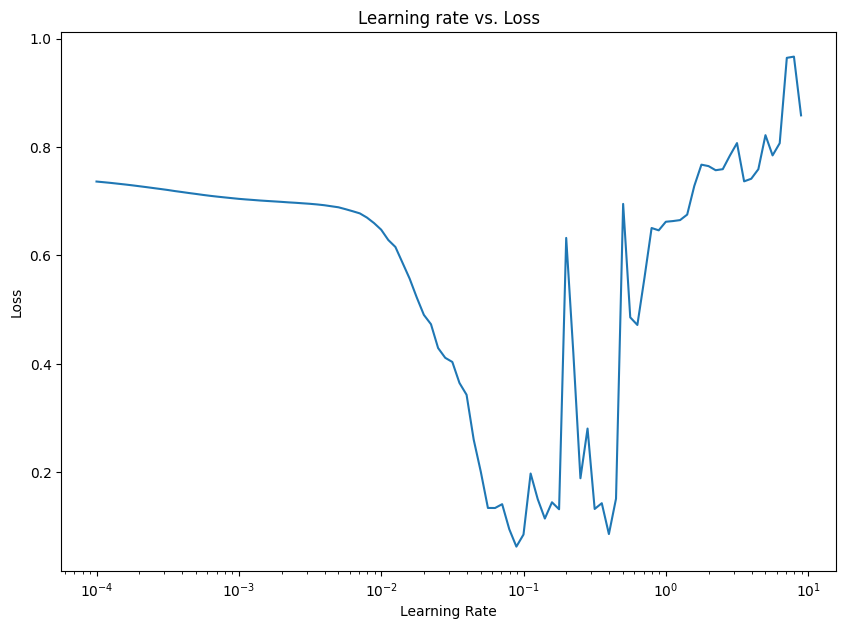

In [59]:
# Plot the lerarning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [60]:
# Let's try using a higher *ideal* learning rate with the sme model as before

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 4s 8ms/step - loss: 0.6911 - accuracy: 0.5387
Epoch 2/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6831 - accuracy: 0.5325
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6753 - accuracy: 0.5625
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6679 - accuracy: 0.5863
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6537 - accuracy: 0.6313
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6243 - accuracy: 0.6488
Epoch 7/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5869 - accuracy: 0.7250
Epoch 8/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5194 - accuracy: 0.7925
Epoch 9/20
25/25 [==============================] - 0s 4ms/step - loss: 0.4574 - accuracy: 0.8075
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3502 - accuracy: 0.8913
Epoch 11/20
25/25 [

In [61]:
# Evaluate the model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0435 - accuracy: 0.9950


[0.04353654757142067, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 3ms/step
doing binary classification


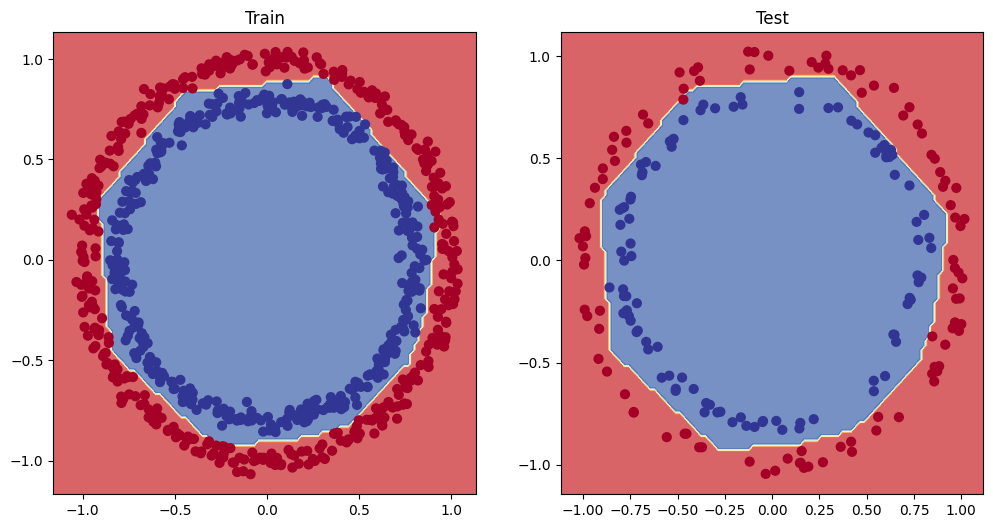

In [62]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

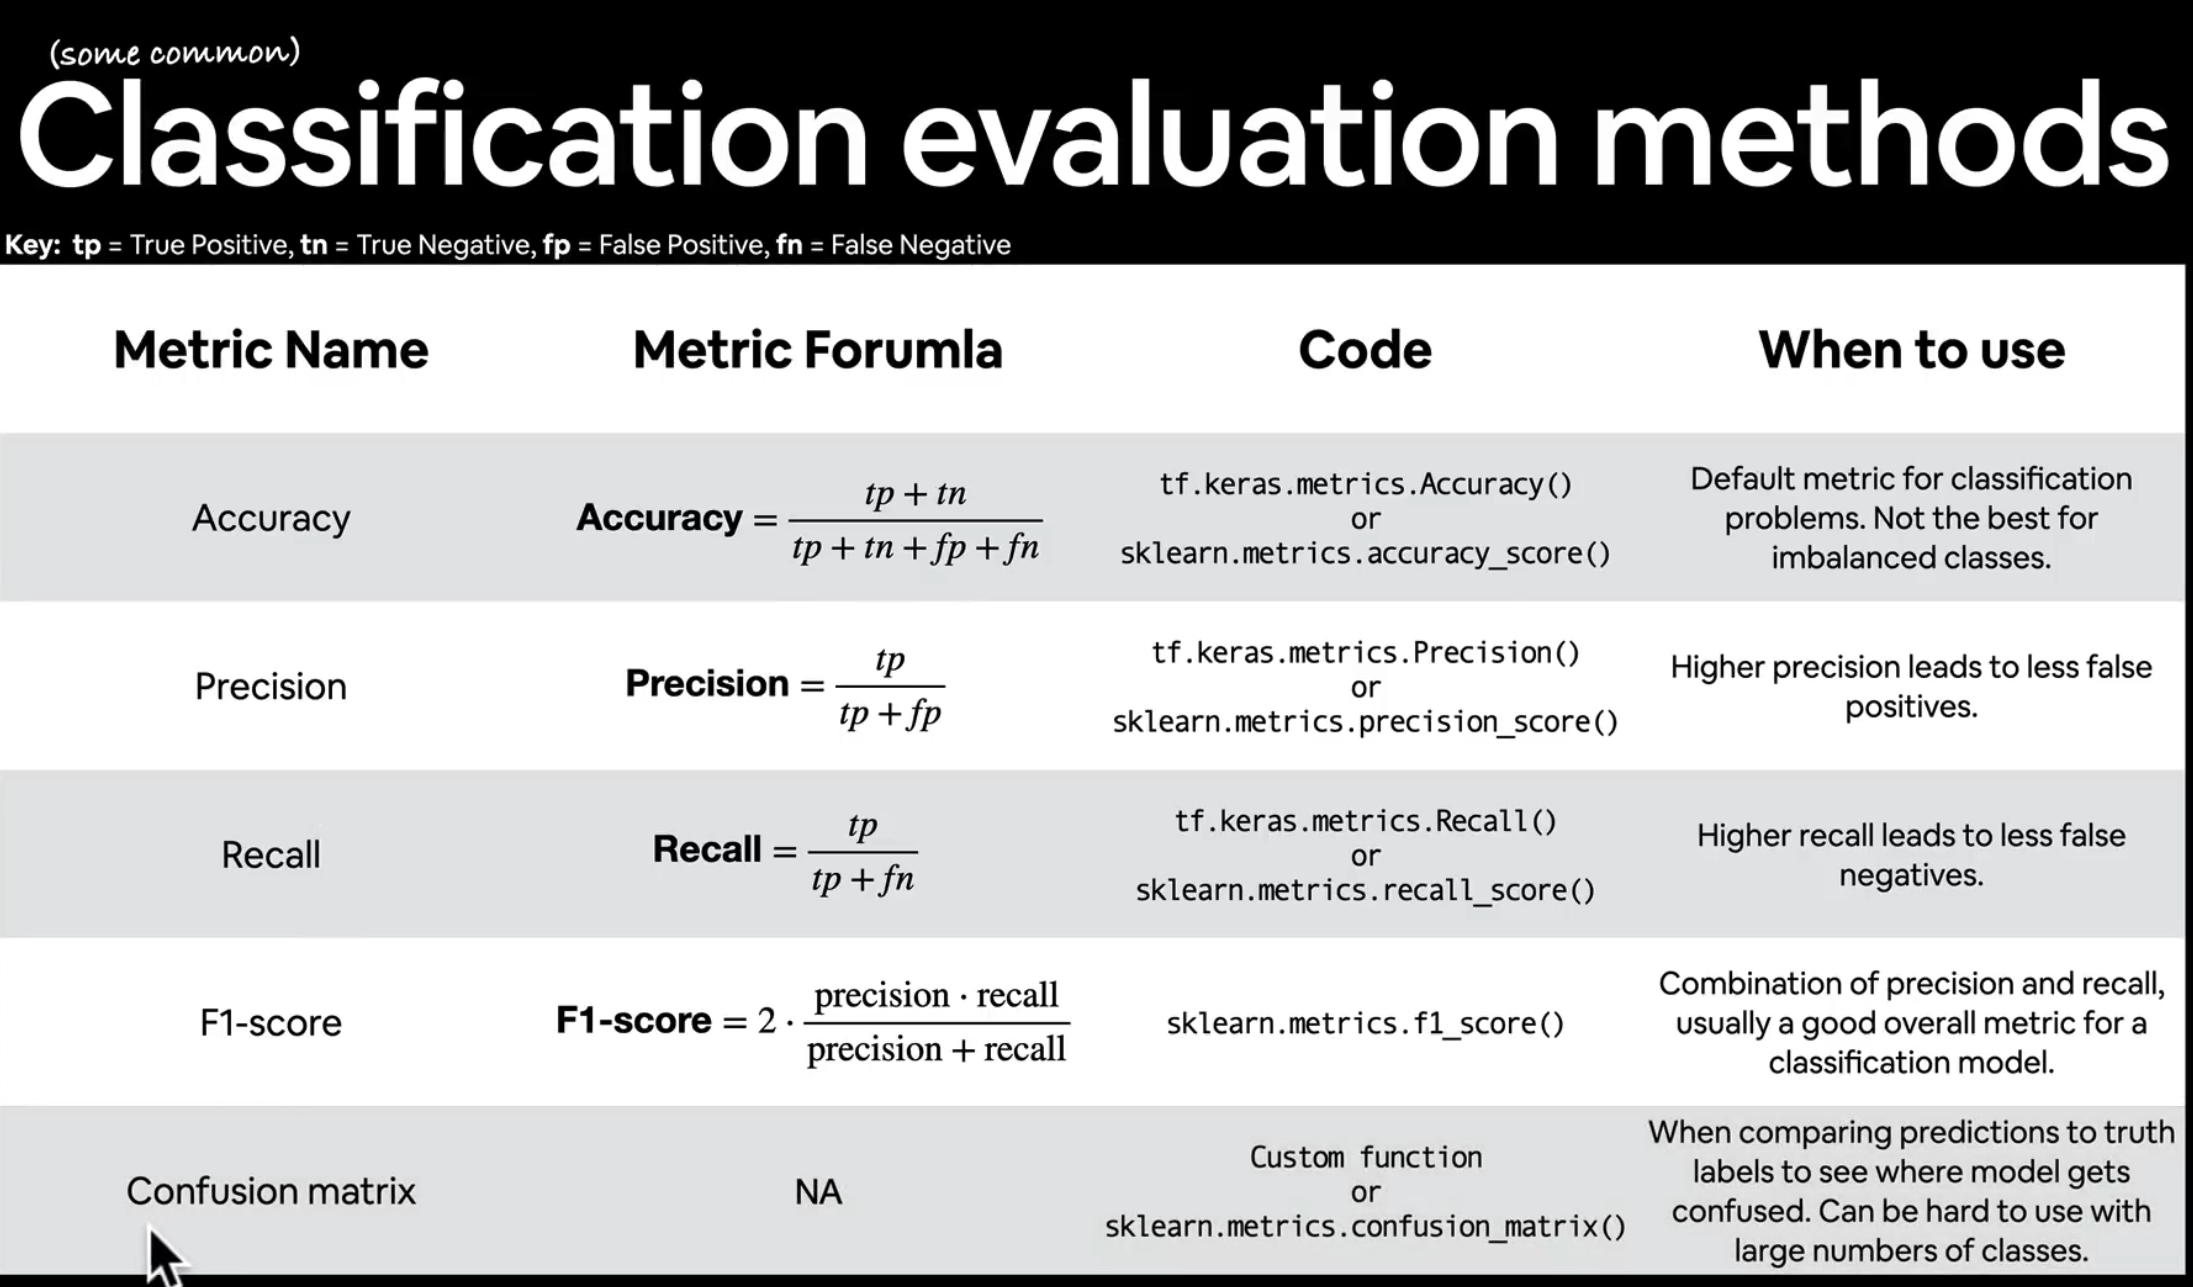

## More classification evaluation methods
Alongside visualizing our models results as much as possible,
there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* Fl—score
* Confusion matrix
* Classification report ( from scikit—learn)

In [63]:
# Check the accuracy of the model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.0435 - accuracy: 0.9950
Model loss on the test set: 0.04353654757142067
Model accuracy on the test set: 99.50%


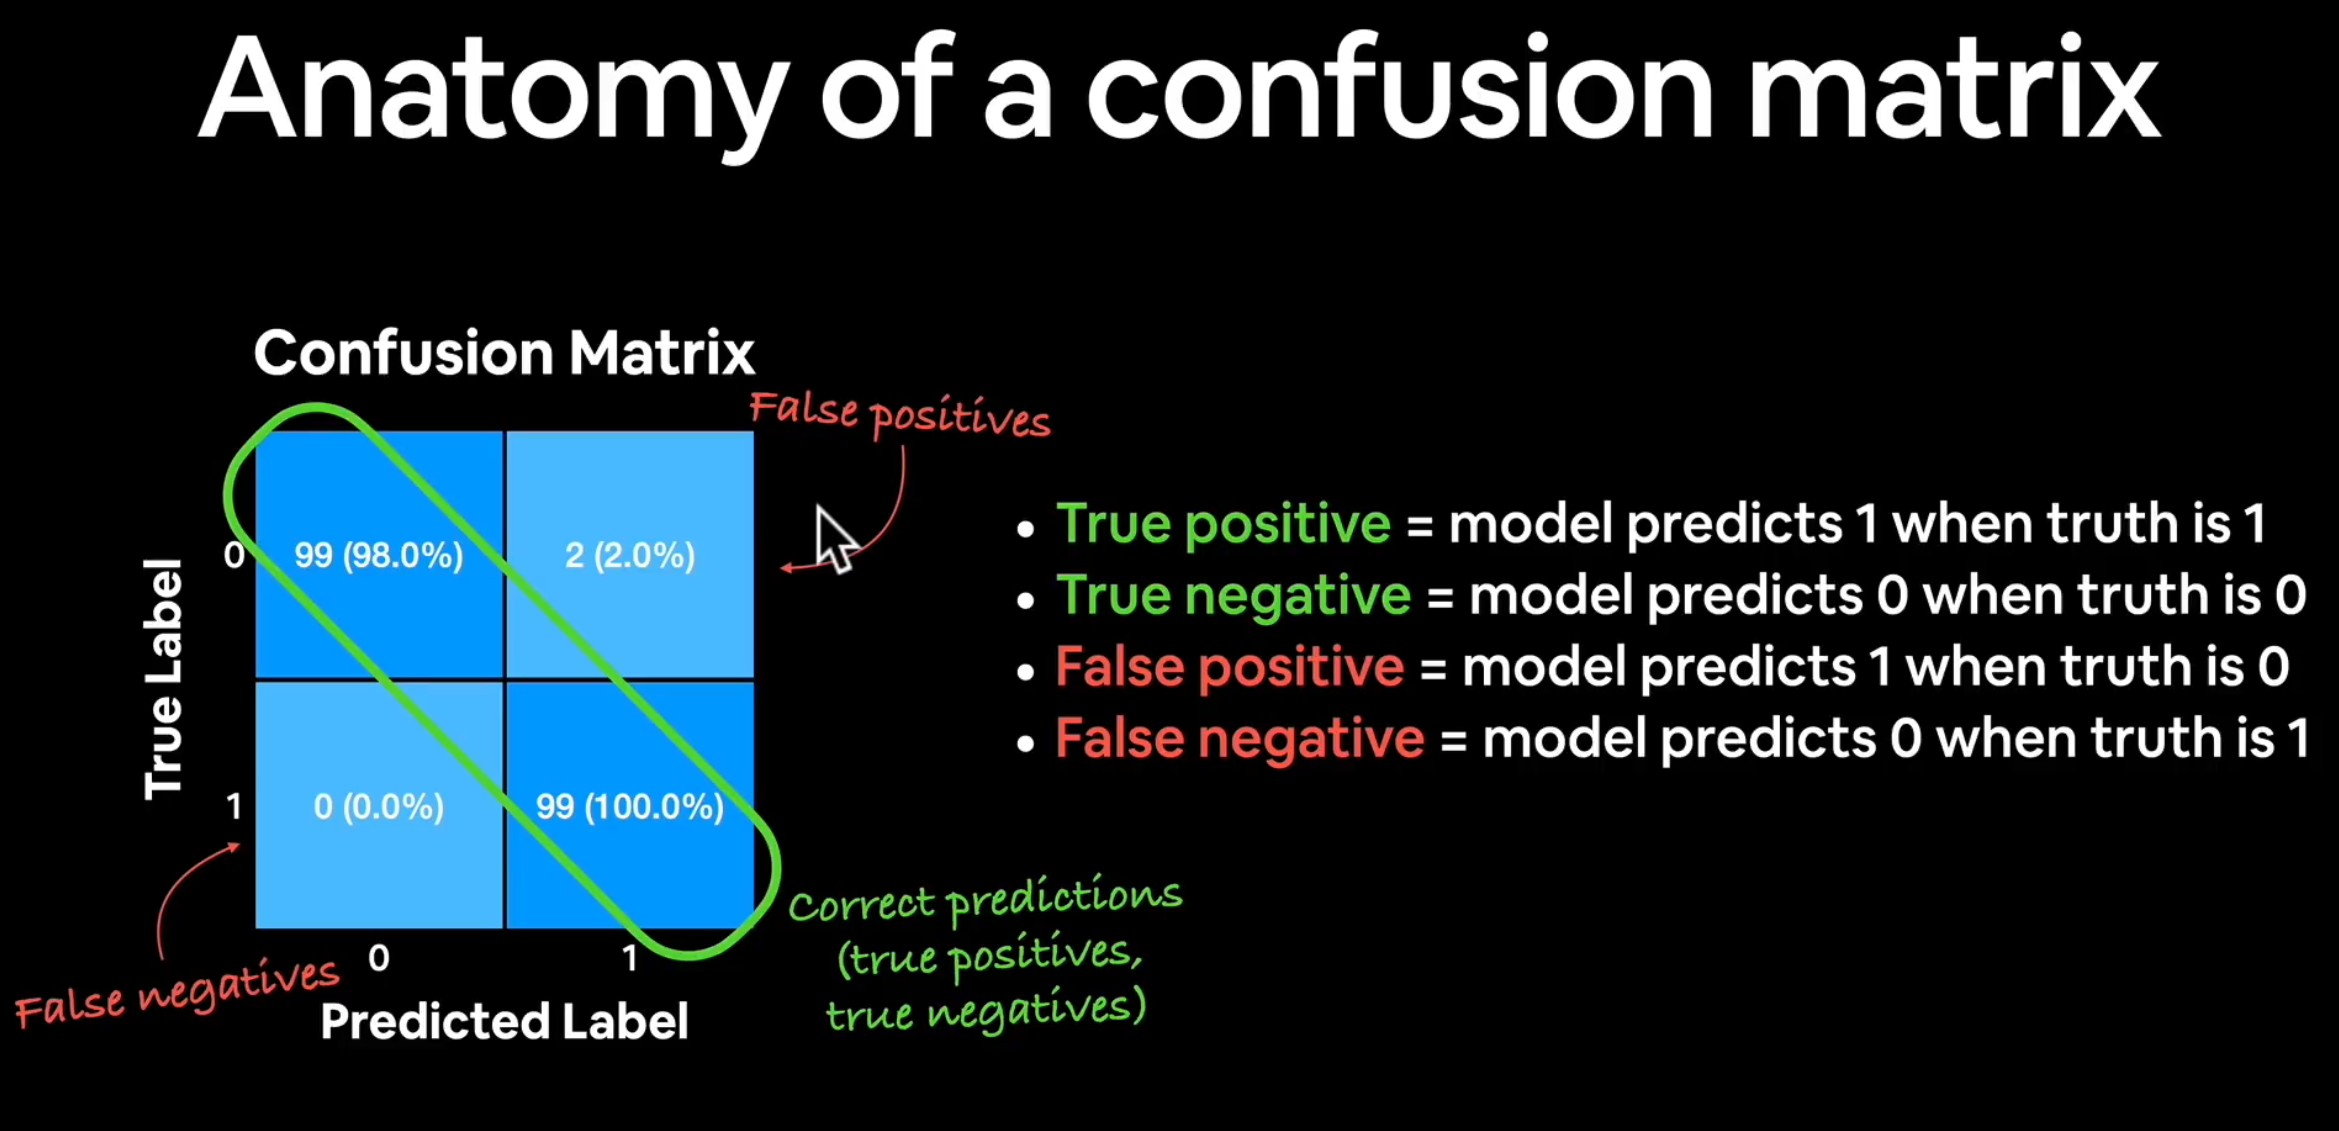

In [64]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

"""
# Create confusion matrix
confusion_matrix(y_test, y_preds)
"""

7/7 [==============================] - 0s 4ms/step


'\n# Create confusion matrix\nconfusion_matrix(y_test, y_preds)\n'

Oops... looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax)
activation functions.

In [65]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [66]:
# Creata a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[100,   1],
       [  0,  99]])

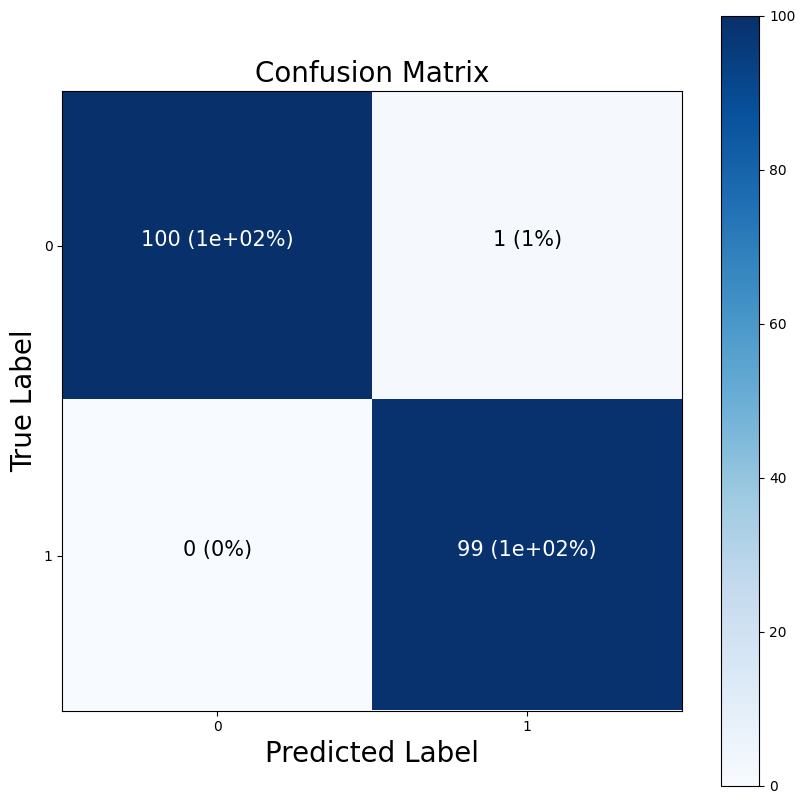

In [67]:
# Confusion matrix x plot_confusion_matrix

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, np.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),  # Corrected typo from xtricks to xticks
       yticks=np.arange(n_classes),  # Corrected typo from ytricks to yticks
       xticklabels=labels,
       yticklabels=labels
       )
# Set X-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.  # Corrected typo from cm.amx() to cm.max()

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1g}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=15)

In [68]:
cm_norm

array([[0.99009901, 0.00990099],
       [0.        , 1.        ]])

In [69]:
cm.shape[0]

2

Working with a larger example (multiclass classification)

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**

* This means if you have have 3 different classes, it's multi-class classification.

* This also means if you have 100 different classes, it's multi-class classification.

To practice mutli—class classificaiton, we're going to build a
neural network to classify images of different items of
clothing.

In [70]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [71]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [72]:
 # Check the shape of a single example
 train_data[0].shape, train_labels[0].shape

((28, 28), ())

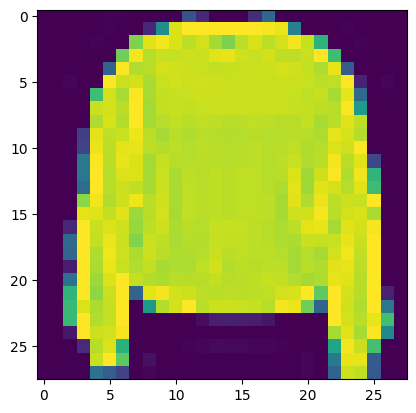

In [73]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [74]:
# Check out sample label
train_labels[7]

2

In [75]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shrit/top", "Trouser", "Pullover", "Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'T-shrit/top')

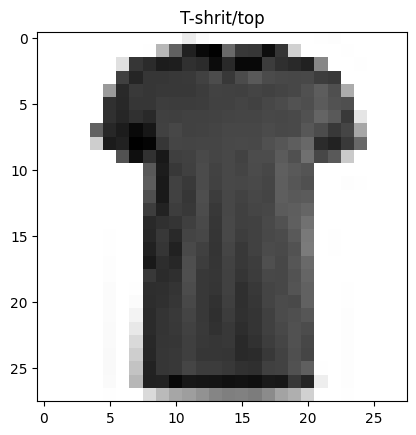

In [76]:
# Plot an example of the image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

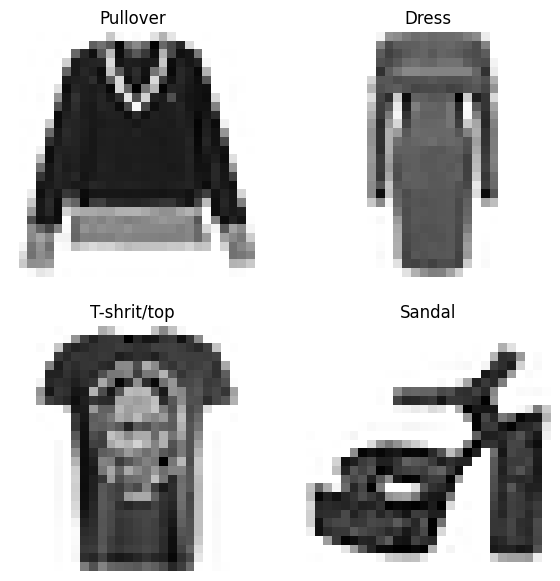

In [77]:
# Plot the multuple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have a tweak a few things:
* Input shape = 28 x 28 ( the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded, use
  CategoricalCrossentorpy()
  * If your labels are integer form use
  SparseCategoricalCrossentropy()
* Output layer activation = softmax(not sigmoid)

In [78]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [79]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [80]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 2.3792 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3029 - accuracy: 0.0985 - val_loss: 2.3029 - val_accuracy: 0.1001
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3030 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy

In [81]:
# Check the model summary
model_11.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 4)                 3140      
                                                                 
 dense_20 (Dense)            (None, 4)                 20        
                                                                 
 dense_21 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [82]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [83]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [84]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3766 - accuracy: 0.4931 - val_loss: 1.0158 - val_accuracy: 0.5957
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8955 - accuracy: 0.6673 - val_loss: 0.8552 - val_accuracy: 0.6933
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7690 - accuracy: 0.7210 - val_loss: 0.7960 - val_accuracy: 0.7084
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7112 - accuracy: 0.7593 - val_loss: 0.7265 - val_accuracy: 0.7669
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6708 - accuracy: 0.7792 - val_loss: 0.6980 - val_accuracy: 0.7711
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6460 - accuracy: 0.7873 - val_loss: 0.7052 - val_accuracy: 0.7671
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6318 - accuracy: 0.7896 - val_loss: 0.6808 - val_accuracy:

<Axes: title={'center': 'Normai1zed data'}>

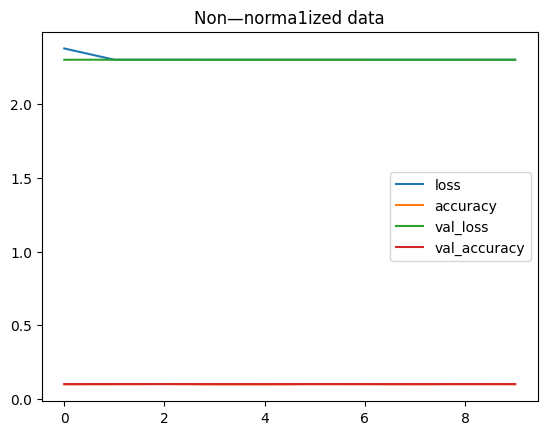

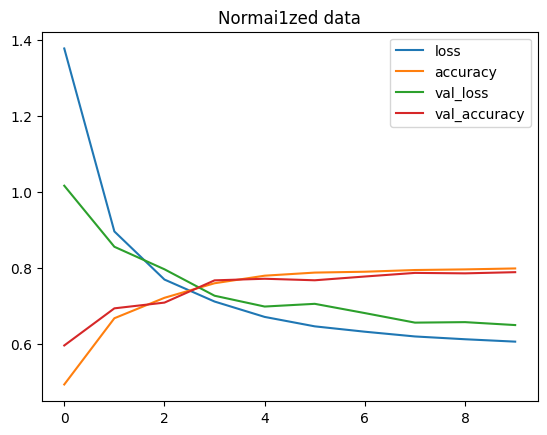

In [85]:
import pandas as pd
# Plot non—normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non—norma1ized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normai1zed data")

🔑 **Note:** The same model with even *slightly* different
data can produce *dramatically* different reuslts. So when
you ' re comparing models, it's important to make sure you're
comparing them on the same criteria (e.g. same architecture
but different data or same data but different architecture) .

# Finding the ideal learning rate

In [86]:
# Set the random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compule model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2400 - accuracy: 0.5506 - val_loss: 0.8012 - val_accuracy: 0.7088 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7067 - accuracy: 0.7276 - val_loss: 0.6863 - val_accuracy: 0.7202 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6240 - accuracy: 0.7702 - val_loss: 0.6258 - val_accuracy: 0.7775 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5780 - accuracy: 0.7982 - val_loss: 0.5995 - val_accuracy: 0.7879 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5587 - accuracy: 0.8062 - val_loss: 0.5757 - val_accuracy: 0.7950 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5481 - accuracy: 0.8105 - val_loss: 0.5841 - val_accuracy: 0.7973 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

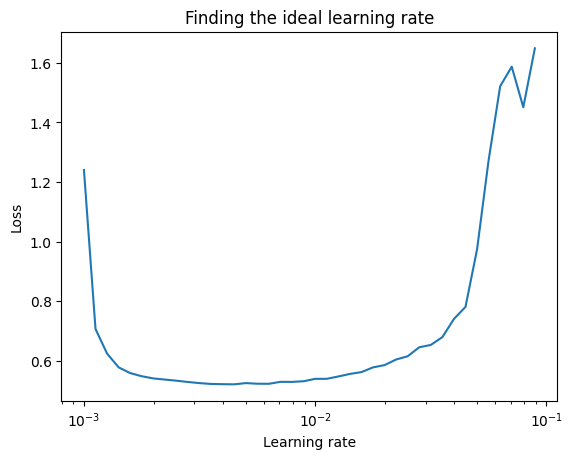

In [87]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In this case, it looks like somewhere close to the default learning rate of the [Adam optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) (`0.001`) is the ideal learning rate.

Let's refit a model using the ideal learning rate.

In [88]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2430 - accuracy: 0.5968 - val_loss: 0.9857 - val_accuracy: 0.6750
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8806 - accuracy: 0.6963 - val_loss: 0.8266 - val_accuracy: 0.7083
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7586 - accuracy: 0.7247 - val_loss: 0.7517 - val_accuracy: 0.7268
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7208 - accuracy: 0.7334 - val_loss: 0.7307 - val_accuracy: 0.7280
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7005 - accuracy: 0.7367 - val_loss: 0.7188 - val_accuracy: 0.7369
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6869 - accuracy: 0.7426 - val_loss: 0.7149 - val_accuracy: 0.7394
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6771 - accuracy: 0.7494 - val_loss: 0.7074 - val_accuracy:

Now we've got a model trained with a close-to-ideal learning rate and performing pretty well, we've got a couple of options.

We could:
* Evaluate its performance using other classification metrics (such as a [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) or [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)).
* Assess some of its predictions (through visualizations).
* Improve its accuracy (by training it for longer or changing the architecture).
* Save and export it for use in an application.

Let's go through the first two options.

First we'll create a classification matrix to visualize its predictions across the different classes.

In [89]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [90]:
class_names

['T-shrit/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [91]:
# Make some predictions with our model
y_probs = model_14.predict(test_data) # probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.2051560e-07, 1.0809533e-06, 8.5637053e-12, 3.7788432e-03,
        7.0470577e-07, 7.7520035e-02, 1.6568096e-08, 2.6583263e-01,
        3.6826648e-02, 6.1603975e-01],
       [2.0486662e-02, 2.1630230e-07, 3.0424219e-01, 1.8046453e-03,
        3.4959283e-01, 1.5080554e-04, 3.1302068e-01, 4.9050476e-07,
        1.0566756e-02, 1.3468707e-04],
       [9.7958717e-09, 9.9541980e-01, 3.7156689e-09, 2.1798531e-05,
        1.5839116e-09, 3.4567027e-03, 8.4525248e-10, 1.1015518e-03,
        2.9770997e-09, 8.6123762e-08],
       [1.5898519e-09, 9.9780273e-01, 4.0346521e-11, 1.8601688e-05,
        4.1222713e-11, 2.2993484e-04, 3.4913739e-11, 1.9485593e-03,
        3.0585387e-10, 6.5524702e-08],
       [2.4454470e-01, 2.1418531e-07, 7.7046260e-02, 2.2728994e-02,
        4.3907382e-02, 3.0169485e-08, 6.1106509e-01, 1.9990976e-07,
        5.6289736e-04, 1.4427600e-04]], dtype=float32)

In [92]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [93]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([3.2051560e-07, 1.0809533e-06, 8.5637053e-12, 3.7788432e-03,
        7.0470577e-07, 7.7520035e-02, 1.6568096e-08, 2.6583263e-01,
        3.6826648e-02, 6.1603975e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [94]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 1- prediction labels
y_preds[:10]

array([9, 4, 1, 1, 6, 1, 4, 4, 5, 7])

In [95]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [96]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[711,   4,  34,  97,  13,   3, 129,   0,   8,   1],
       [  1, 934,  17,  36,   5,   4,   3,   0,   0,   0],
       [ 12,   3, 739,  11, 201,   1,  31,   0,   2,   0],
       [ 34,  12,  25, 833,  34,  10,  41,   0,  10,   1],
       [  1,   1, 134,  23, 808,   5,   9,   0,  19,   0],
       [  0,   0,   0,   4,   1, 922,   0,  42,   6,  25],
       [145,   2, 200,  41, 423,   5, 173,   0,  11,   0],
       [  0,   0,   0,   0,   0,  54,   0, 899,   0,  47],
       [  0,   0,   8,  11,  58,  12,  12,   3, 891,   5],
       [  0,   0,   0,   5,   1,  21,   0,  47,  11, 915]])

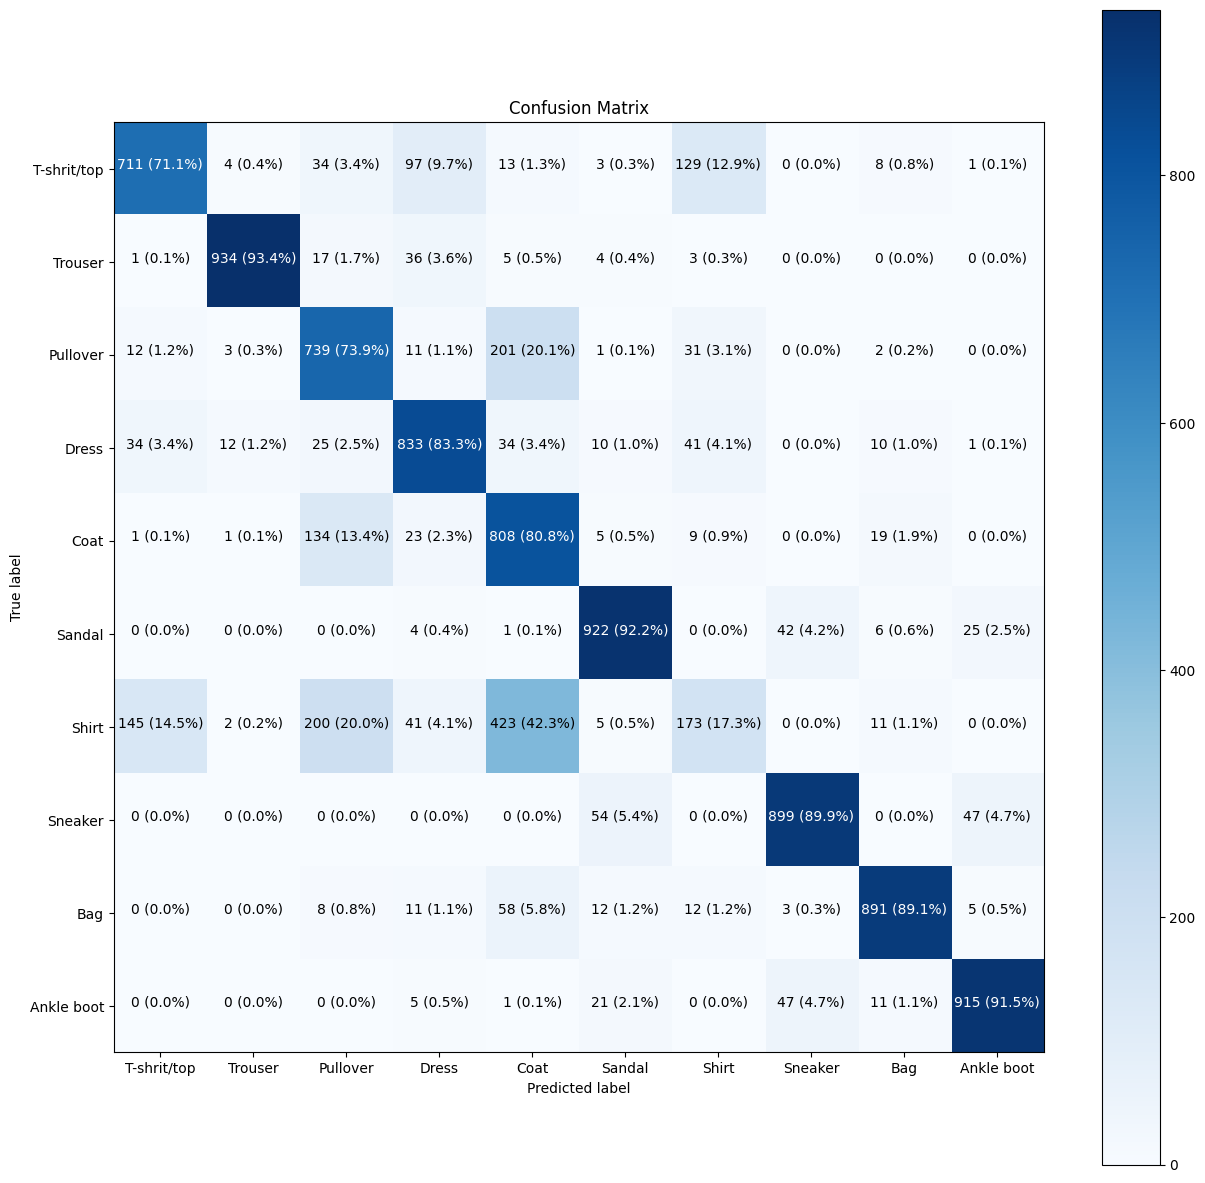

In [97]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

That looks much better! (one of my favourites sights in the world is a confusion matrix with dark squares down the diagonal)

Except the results aren't as good as they could be...

It looks like our model is getting confused between the `Shirt` and `T-shirt/top` classes (e.g. predicting `Shirt` when it's actually a `T-shirt/top`).

> 🤔 **Question:** Does it make sense that our model is getting confused between the `Shirt` and `T-shirt/top` classes? Why do you think this might be? What's one way you could investigate?

We've seen how our models predictions line up to the truth labels using a confusion matrix, but how about we visualize some?

Let's create a function to plot a random image along with its prediction.

> 🔑 **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the outputs of your model.

In [98]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 38ms/step


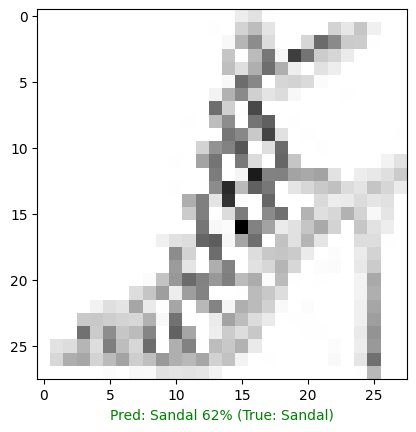

In [101]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data, # always make predictions on the same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

In [102]:
# Extract a particular layer
model_14.layers[1]

In [104]:
# Get the patterns of a layers in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.23205478,  0.5900232 , -0.06721472, -0.548901  ],
        [-0.02787557,  0.5468115 , -0.20270848, -1.2528843 ],
        [-0.10174911, -0.1494894 , -1.1577225 , -0.12646937],
        ...,
        [-0.23337443,  0.3278424 , -0.31407085, -0.5893185 ],
        [-0.3065645 ,  0.0516084 ,  0.15360926,  0.14944588],
        [ 0.30689892,  0.45493874, -0.7740674 ,  0.0430392 ]],
       dtype=float32),
 (784, 4))

In [105]:
model_14.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 4)                 3140      
                                                                 
 dense_29 (Dense)            (None, 4)                 20        
                                                                 
 dense_30 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as zeroes by default (using the [`bias_initializer` parameter](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

Now we've built a few deep learning models, it's a good time to point out the whole concept of inputs and outputs not only relates to a model as a whole but to *every* layer within a model.

You might've already guessed this, but starting from the input layer, each subsequent layer's input is the output of the previous layer.

We can see this clearly using the utility [`plot_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model).

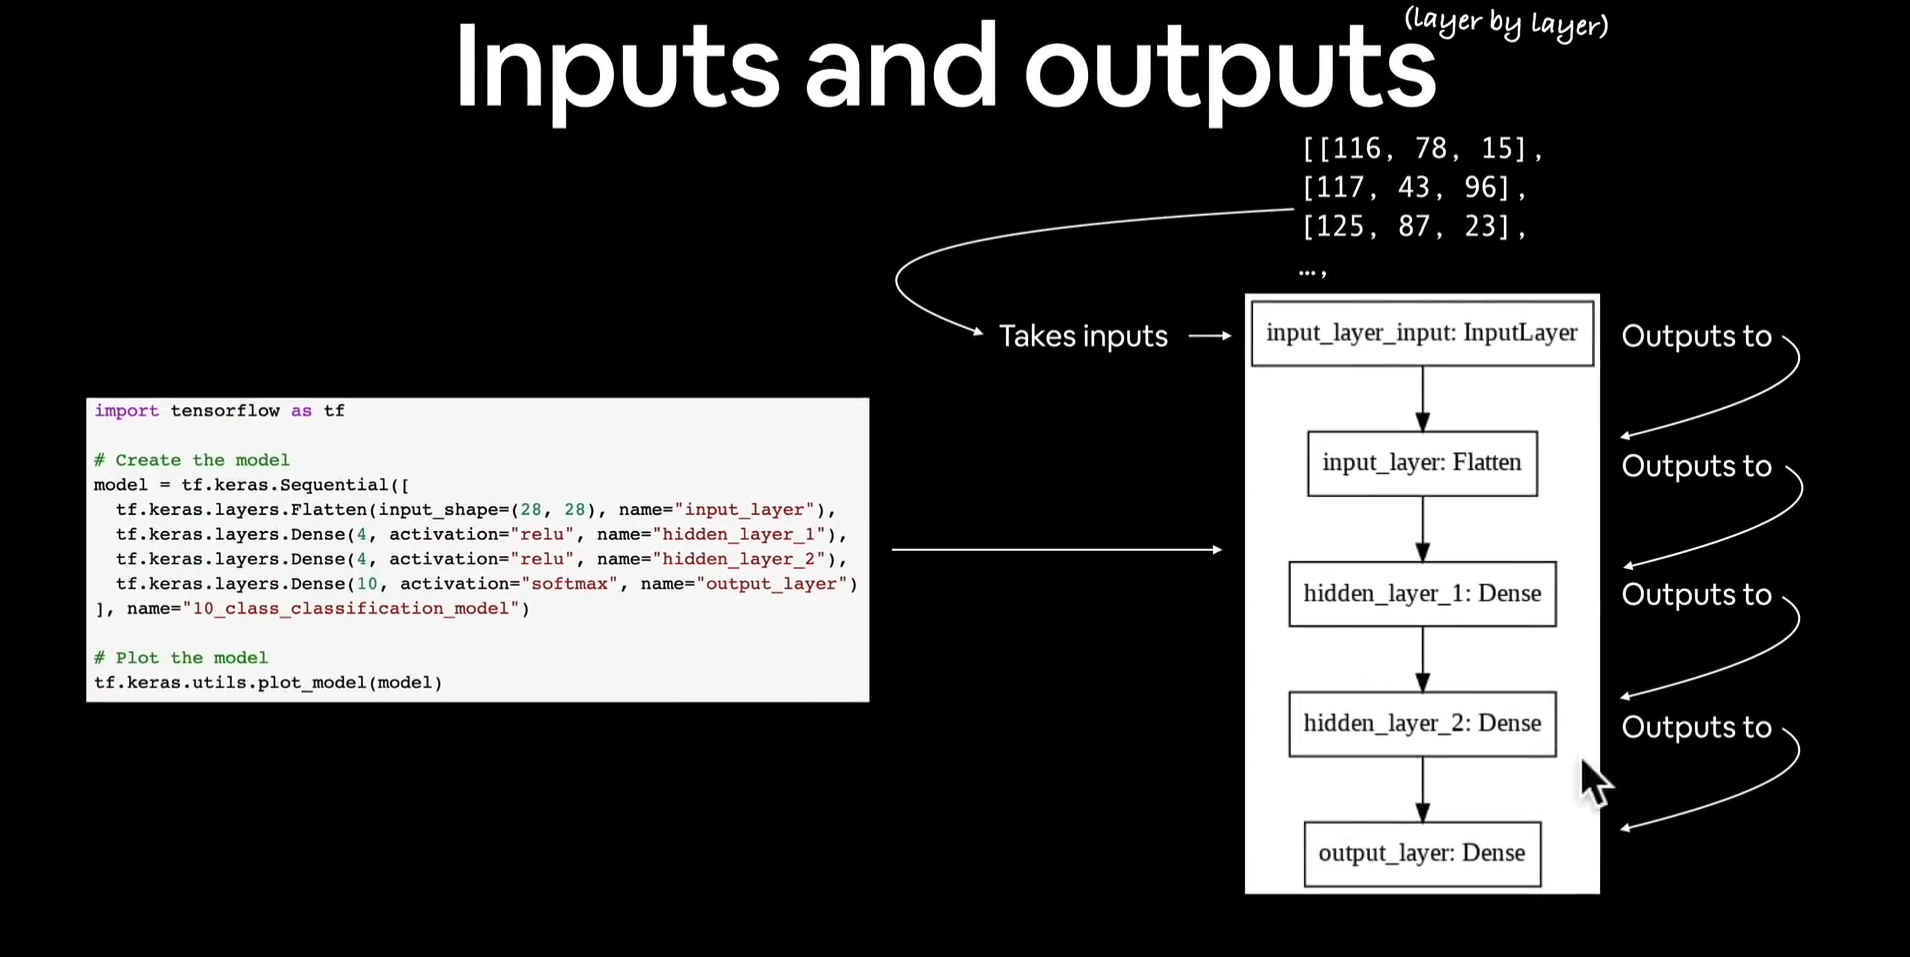

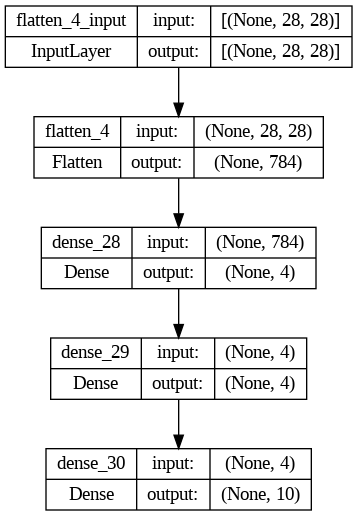

In [106]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)